In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as  vif
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as ms, 
                         summarize, poly)
# Inspecting objects and Namespace
#dir()


In [6]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A.sum(axis=0)

array([12, 15, 18])

In [8]:
# Simple Linear Regression
# Load the data
Boston = load_data('Boston')
Boston.head()
Boston.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [9]:
Boston


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [11]:
# Fit the model using sm.OLS
# The dependent variable is medv (median house value) and lstat (percentage of lower status of the population) is the independent variable

# Create a model specification
X = pd.DataFrame({'intercept' : np.ones(Boston.shape[0]), 'lstat' : Boston['lstat']})
#X = sm.add_constant(X)
X[:4] # Show the first 4 rows



,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [13]:
# Extract the response variable and fit the model
y = Boston['medv']
model = sm.OLS(y, X) # Create a model
results = model.fit() # Fit the model
summarize(results) # Summarize the results

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


The coefficients can be put into the model of the form y = ax + b as follows:

Coefficient	Value	Interpretation
a	-0.9500	Slope of the line
b	34.5538	y-intercept of the line
The equation for the model is:

y=−0.9500x+34.5538

This means that for every unit increase in x, the value of y decreases by 0.9500 units, on average. The y-intercept of the line is 34.5538, which means that the line intersects the y-axis at the point (0, 34.5538).

- Possible Interpretations (Based on Assumptions):

Assuming the data comes from a linear regression model where "lstat" is the independent variable and "intercept" is a constant term, here's a possible interpretation:

- Intercept: The intercept (34.5538) represents the predicted value of the dependent variable when "lstat" is zero.
- lstat coefficient: The coefficient for "lstat" (-0.9500) indicates a negative association with the dependent variable. As "lstat" increases (more likely a lower socioeconomic status area), the predicted value of the dependent variable decreases.
- Standard error: The standard error (0.039) provides an estimate of the variability in the coefficient around its true value.
- t-statistic: The t-statistic (-24.528) is a measure of the coefficient's significance. A large absolute value (like here) suggests a statistically significant relationship between "lstat" and the dependent variable.
- p-value: The p-value (0.0) indicates that the observed relationship is unlikely to be due to chance. With such a low p-value, we can reject the null hypothesis that there's no association between "lstat" and the dependent variable.



# Using Transformation Fit and Transform

- My model has only a single predictor and contructin X was straight forward. In practice we often fit models with more predictors. (from an array or dataframe).
- We introduce transformation to the variables **before fitting** the model, **specify the interactions between variables** and **expand** some var into **sets** of var(eg. pylynomials). 
- Sklearn: uppfylls this type of task: **a transform**.
- **Transform** is an obj created with some parameters as arguments. 
- **Object** has two main methods: **fit()** and **transform()**
- General approch to spec the models and construct the **model matrix** throught **ModelSpec()** in **ISLP lib** 
- **ModelSpec()** renamed **MS()** creates a trans obj, and then **a pair of methods transform( ) and fit()** are used to construct a corresponding model matrix. 
- Describe process in simple regr model using a single predictor lstat
- **Transform**  is created by expression **design = MS(['lstat])
- **fit()** method takes original array and do some initial comput on it, as spec in trans obj.
  Eg. compute means and std for centering and scaling
- **transform()** method applies the **fitted transformation** to the array of data, and produce the model matrix. 

In [15]:
design = ms(['lstat']) # Create a model specification object
design = design.fit(Boston) # Fit the model
X = design.transform(Boston) # Transform the data
X[:4] # Show the first 4 rows

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


- In this simple case the **fit()** do very little; it simply checks that the variable 'lstat'  specified in **design** exists in **Boston**. 
- **transform()** constructs the model matrix with 2 col's: **intercept** and **lstat**. 
 

In [16]:
# Combine the model specification and the model with fit.transform()
design = ms(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


- The obj **results** has several methods that can be used for **inference**.
- We presentet **summarize()** for showing the essentials of the fit.
- Use **summary()** method for exhaustive output
- 

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           5.08e-88
Time:                        20:27:13   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
results.params # Show the estimated coefficients fitted by the model

intercept    34.553841
lstat        -0.950049
dtype: float64

- **get_prediction()** method can obtain predictions, and prod K:I  and **predictions** of **mdev** for a given val's of **lstat**
- 1. Create new df containg only the var **lstat**, with the values for this var at which we wish to make the predictions. 
- 2. Use **transform()** metod of **design** to create the corresponding model matrix. 

In [19]:
new_df = pd.DataFrame({'lstat':[5, 10 , 15]})
new_X = design.transform(new_df)
new_X

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


- Compute the predictions at **new_X** and wiew the by extracting the **predicted_mean attribute**

In [24]:
new_prediction = results.get_prediction(new_X)
new_prediction.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [25]:
# Produce a confidence interval for the prediction
new_prediction.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [26]:
# Produce a prediction interval
new_prediction.conf_int(obs=True, alpha=0.05)


array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

- As expected the K:I and P:I are **centre** around the same point( a predicte val of 25.05 for **mdev** when **lstat** equal 10) but as we know the P:I is wider 

## Define Functions 


In [31]:
# Define a function that add a line to an existing plot
#def abline(ax, b, m): # define the function which takes the axis and the slope and intercept
    """Add a line with slope m and intercept b to ax
    ax is an axis object for exisiting plot
    b is the intercept
    m is the slope of the line
    ploting options can be added to ax.plot by including
    them as arguments to this function"""
   # xlim = ax.get_xlim()
    #ylim = [m * xlim[0] + b, m * xlim[1] + b]
    #ax.plot(xlim, ylim, 'k-')

In [41]:
# Define a function whit more arguments
def abline(ax, b, m, *args, **kwargs): 
    """Add a line with slope m and intercept b to ax"""
    xlim = ax.get_xlim() # Get the x-axis limits
    ylim = [m * xlim[0] + b, m * xlim[1] + b] # Calculate the y-axis limits
    ax.plot(xlim, ylim,*args, **kwargs) # Add the line to the plot

# *args allows for an arbitrary number of positional arguments to abline
# **kwargs allows for an arbitrary number of keyword arguments to abline such as color, linestyle, etc. to abline
# the arguments are passed to ax.plot
    

- Use the function to add this regr line to a plot **medv** vs **lstat**
  

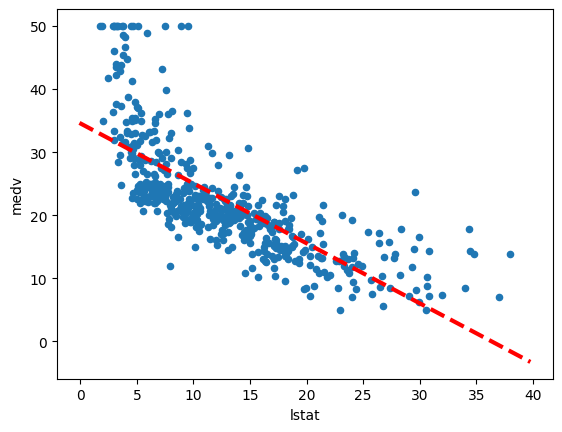

In [42]:
# plot **medv** against **lstat** using DataFrame.plot.scatter() and wish to add the regression line to resulting plot
ax = Boston.plot.scatter('lstat', 'medv') # Create a scatter plot
abline(ax, results.params[0], results.params[1],'r--', linewidth=3) # Add the regression line to the plot


- Final call **ax.plot()** is **ax.plot(xlim, ylim, 'r--', linewidth=3)
- 1. We used 'r--' to produce redline and added argument to make it width 3 
- ###  We could use the function **ax.axline() to add a line to the plot but is good to know how to make this funtions that can help to create more expressive displays
- 

#### Examine diagnostics plots 

- Find the fitted values and residuals of the fit as **attributes**  of the results obj
- Various **influence mesures** describing the regr model are computed with the **ge_influence() method** 
- Dont use the **fig** component returned as the first value from **subplots()** we simply capture the second value in **ax**

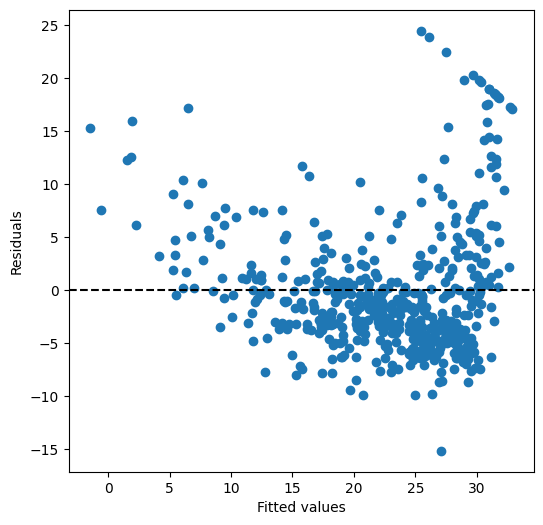

In [44]:
ax = subplots(figsize=(6, 6))[1] # Create a new figure
ax.scatter(results.fittedvalues, results.resid) # Create a scatter plot of the residuals against the fitted values
ax.set_xlabel('Fitted values') # Set the x-axis label
ax.set_ylabel('Residuals') # Set the y-axis label
ax.axhline(0, c='k', ls='--') # Add a horizontal line at 0 to the plot

- We added a horizontal line at 0 for reference using **ax.axhline() method** 
- Indicateing that it should be black **c='k'** 
- Dashed line **ls='--'** 
- Leverage stat's can be computed for any nr of predictors using **hat_matrix_diag() attribute** of the value returned by the **get_influence() method** 


374

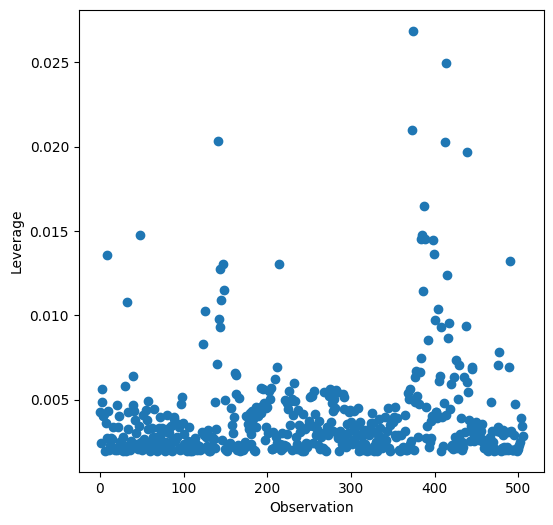

In [45]:
infl = results.get_influence() # Get the influence object
ax = subplots(figsize=(6, 6))[1] # Create a new figure
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag) # Create a scatter plot of the leverage statistics
ax.set_xlabel('Observation') # Set the x-axis label
ax.set_ylabel('Leverage') # Set the y-axis label
np.argmax(infl.hat_matrix_diag) # Find the observation with the highest leverage

- **np.argmax()** functio id the index of the largest element of an array, optionally computed over an axis of the array. In this case, we maximize over the entire array to determine wich obs has the largest leverage statistic. 

## Multiple Linear Regr

- In order to **fit multi lin regr model** using **ols**, we use again the **ModelSpec() transform** to const the require model matrix and response. **The arguments to ModelSpec()** can be quite **general** but in this case **a list of columns** sufice. 
- Cosider here a **fit** with 2 variables **lstat and age**.  

In [46]:
# Multiple Linear Regression
# Fit the model using sm.OLS
X = ms(['lstat', 'age']).fit_transform(Boston) # Create a model specification and fit the model
model1 = sm.OLS(y, X) # Create a model
results1 = model1.fit() # Fit the model
summarize(results1) # Summarize the results

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


- Notice we compacted the first line into a succint expression describing the construction of X.
- The **Boston** data set contains 12 variables , and so it would be cumbersome to have to type all of this in order to perform the regr using all the predictors. Insteed we use shorhand:

In [47]:
terms = Boston.columns.drop('medv') # Drop the response variable
terms 

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

- Fit the model with all the var in **terms** using the same **model matrix builder**.

In [48]:
# Use same model specification for the response variable
X = ms(terms).fit_transform(Boston) # Create a model specification
model2 = sm.OLS(y, X) # Create a model
results2 = model2.fit() # Fit the model
summarize(results2) # Summarize the results


,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


- Run a regr exept one(eg. without the age predictor)

In [49]:
minus_age = Boston.columns.drop('age') # Drop the age variable
Xma = ms(minus_age).fit_transform(Boston) # Create a model specification
model3 = sm.OLS(y, Xma) # Create a model
results3 = model3.fit() # Fit the model
summarize(results3) # Summarize the results

,coef,std err,t,P>|t|
intercept,-6.518000e-14,1.920000e-12,-3.400000e-02,0.973
crim,7.547000e-16,1.220000e-14,6.200000e-02,0.951
zn,-1.250000e-16,5.090000e-15,-2.500000e-02,0.980
indus,-7.812000e-16,2.270000e-14,-3.400000e-02,0.973
chas,-2.337000e-15,3.210000e-13,-7.000000e-03,0.994
nox,4.578000e-14,1.390000e-12,3.300000e-02,0.974
rm,-5.845000e-15,1.620000e-13,-3.600000e-02,0.971
dis,1.771000e-15,7.470000e-14,2.400000e-02,0.981
rad,-2.060000e-16,2.480000e-14,-8.000000e-03,0.993
tax,-3.767000e-15,1.400000e-15,-2.683000e+00,0.008


## Multivariate Goodness of Fit

- We can acces the individual components of **results** by **name** (**dir(results)**) shows what is awailible. 
- **results.rsquared** give us **R^2** 
- **np.sqrt(results.scale)** give us **RSE**

- **Variance inflation factors** (section 3.3.3) are sometimes usefull to **asesst effect of collinearity** in the model matrix of regr model. 
- We compute **VIF's** in our **multi-regr-fit**, and use the oportunity to intro the ideea of **LIST COMPREHENSSION** 

### List Comprehenssion

- Often we encounter a sequence of obj which we may want to trans for some other task. Below, we compute the **VIF** for each feature in our **X matrix** and produce a df whose index agrees with the col's of **X**.
- Notion of **Ls-compr**  can make such task easyer.
- 1. LS-compr  are simple and powerfull ways to form lists of py obj. The language olso supports **dict and generator-compr** 

- We compute the **VIF** for each of the variables in the model matrix X, usig the func **variance_inflation_factor()**.
  

In [53]:
vals = [vif(X, i) for i in range(1, X.shape[1])] # Calculate the VIF for each variable
vif = pd.DataFrame({'vif': vals}, index=X.columns[1:]) # Create a DataFrame with the VIF values
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


#### VIF

- func **vif()** takes two arguments:
- 1. a dataframe or array 
- 2. a variable column idex
We have excluded col 0 above (the intercept) which is not of iterest.

- The obj **vals** could have been constructe with the fallowing for loop:

In [ ]:
# Construct obj vals with the VIF values and for loop
vals = []
for i in range(1, X.shape[1]):
    vals.append(vif(X, i))


- Lst-compr allows us to perform such repetitive operations in more straightforward way

## Interaction Terms

- It is easy to **include interaction terms** in lin_model using **Model-Spec()**. 
- Including a **tuple ('lstat', 'age')** tells  the **model matrix** builder to include an **interaction term** --between-- the **lstat and age**. 

In [55]:
X = ms(['lstat', 'age',('lstat', 'age')]).fit_transform(Boston) # Create an interaction term and fit the model
model4 = sm.OLS(y, X) # Create a model
results4 = model4.fit() # Fit the model
summarize(results4) # Summarize the results

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


## Non linear Transformations of the Predictors 

- The model matrix builder can include terms **beyond** just col's, names and interactions. For instance, the **poly()** function supplied in **ISLP** specifies that col's repr **polynomial functions** of its first argument are **added** to the model matrix.

In [ ]:
X = ms([poly('lstat', degree=2), 'age']).fit_transform(Boston) # Create a quadratic term and fit the model
model5 = sm.OLS(y, X) # Create a model
results5 = model5.fit() # Fit the model
summarize(results5) # Summarize the results

- The effectivly **zero p-value** associated with the quadratic term suggest an improvment in the model.
- By defaul, **poly()** creates the **basis matrix** for inclussion in the model matrix whose col's are **orthogonal polynomial**, which are designed for stable ols comp's.
- Alt had we incl an argument **raw=True** in above call **poly()**, the matrix would consist simple of **lstat and lstat^2**. Since either of these bases repr **quadratic polynomials** the fitted values would not change in this case, just the polynomial coeff's. 
- By default, the columns created by **poly()** do not incl an intercept col as that is auto added by **MS**. 


- **Use anova_lm() func to further quatify the extent to which the quadratic fit is superior to the linear fit** 

In [64]:
anova_lm(results1, results2) # Perform an ANOVA test

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,493.0,11349.418808,10.0,7818.7098,33.963183,3.565625e-50


- In anova_lm the first argument **result1** repr the **linear sub-model** containing the **predictors lstat and age**
- Second argument in anova **result2** corespond to the larger model above with the **quadratic term in lstat**. 

- The **anova_lm()** function perform a hypothesis test comparing the two models:
- 1. Null hypothesis is that quadratic term in the bigger model is not needed
- 2. Alpha/ alternativ hypo is that the bigger model is superior.


- Here F-stat is ''' and p-val is zero:
- 1. F-stat is the square of the **t-stat** for the quadratic term in the linear model summary for the **result3** a consequence of the fact that these nested models differ by one degree of freedom. This provides very clear **evidence** that the quadratic polynomial in **lstat** improves the ln-model.

- 2. The func **anova_lm()** can take more than 2 nested models as input, in which case it compares every successive pair of models. That olso explains why there are **NaN's** in the first row above, **since there is no previous model with which to compare the first**.
  

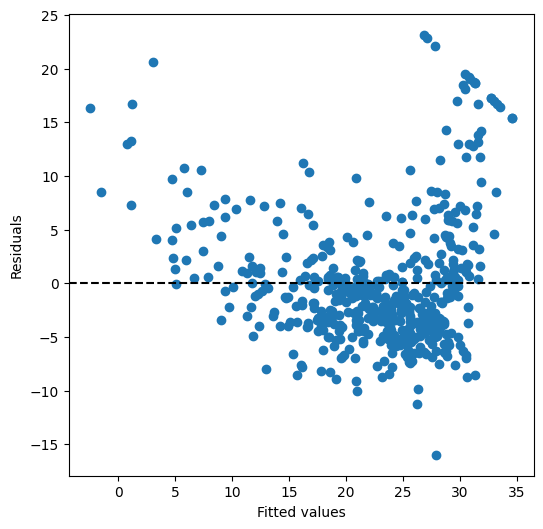

In [70]:
ax = subplots(figsize=(6, 6))[1] # Create a new figure
ax.scatter(results1.fittedvalues, results1.resid) # Create a scatter plot of the residuals against the fitted values
ax.set_xlabel('Fitted values') # Set the x-axis label
ax.set_ylabel('Residuals') # Set the y-axis label
ax.axhline(0, c='k', ls='--') # Add a horizontal line at 0 to the plot

- We see that when quadratic term is incl in the model, there is little discernible pattern in the residuals. 

- In order to create a **cubic or higher-degree polynomial** fit, we just change the degree arg to **poly()**.
  

## Quadratic Predictors

- We use **Carsets data** incl in the **ISLP package**. We attept to predict **sales** in 400 locations based on nr of predictors. 

In [72]:
Carsets = load_data('Carseats')
Carsets.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

- **Carseats** data incl **qualitative** predictors such as **ShelveLoc** an indicator of the quality of the shelving location-- that is, the space within a store in which the car seat is displayed. The **predictor ShelveLoc** takes on three posible values:**Good, Bad, Medium**
- Given a **qualitative variable such as ShelveLoc**, **ModelSpec()** generates a **dummy variables**  automaticaly.
- This variable are often referred as a **one-hot-encoding** of the **categorical feature**.
- Their col sum to one, so to **avoid colliniarity** with an **intercept** the first column is **dropted**.

- We **drop** the col **ShelveLoc[Bad]** since is the first level of **ShelveLoc.**
  
- Bellow we fit a multi-regr-model that includes some [Interaction] terms.

In [73]:
allvars = list(Carsets.columns.drop('Sales')) # Drop the response variable
y = Carsets['Sales'] # Extract the response variable
final = allvars + [('Income', 'Advertising'), ('Price', 'Age')] # Create the final model specification including interaction terms
X = ms(final).fit_transform(Carsets) # Fit the model
model = sm.OLS(y, X) # Create a model
summarize(model.fit()) # Summarize the results

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


- In the first line, we made **allvars** a list, so that we could add two interaction terms 2 lines down
- Our model matrix builder has created a **ShelveLoc[Good] dummy var** that takes on a value of 1 if the loc is Good, 0 otherwise.
- It has olso created **ShelveLoc[Medium] dummy variable** that equals to 1 if the shelving loc is medium and 0 otherwise
- A **Bad shelwing loc quals to 0** for each of the 2 dummy variables.

- The fact that the **ShelveLoc[Good]** is positive in the regr output indicates that **a good shelving is associated with high sales**.
- Positive **ShelveLoc[Medium]** but smaller coefficient indicating that **medium shelving loc leads to higher sales than the bad shelving loc, but lower sales the good location.  